In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
#create a DataFrame
zips_df = pd.read_csv('zip_code_demographics.csv')

In [3]:
zips_df.head()

,zip,lat,lng,city,state_id,state_name,population,density,county_name,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,1001,42.06262,-72.62521,Agawam,MA,Massachusetts,16088,550.1,Hampden,0,1.387035,106.145765,12.946212,93.049251,438.0,598807,6.047690e+05,9320
1,1002,42.37633,-72.46462,Amherst,MA,Massachusetts,27323,198.1,Hampshire,0,14.438177,112.264368,21.080079,133.370144,571.0,989558,1.005796e+06,9880
2,1005,42.42117,-72.10655,Barre,MA,Massachusetts,4947,44.2,Worcester,0,16.788339,90.664964,25.547718,97.639881,97.0,164207,1.660540e+05,2490
3,1007,42.28163,-72.40009,Belchertown,MA,Massachusetts,15304,107.7,Hampshire,0,13.663839,101.552921,14.762395,114.406034,217.0,647074,6.547390e+05,7970
4,1008,42.18234,-72.95819,Blandford,MA,Massachusetts,1171,7.4,Hampden,0,2.593655,136.548797,20.177950,107.466779,18.0,47826,4.824100e+04,660


In [4]:
zips_df.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'population',
       'density', 'county_name', 'po_box', 'dist_highway',
       'dist2_large_airport', 'dist2_medium_airport', 'dist_to_shore',
       'number_of_business', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [18]:
#number of biz and distance to shore
biz_df = zips_df[['number_of_business','dist_to_shore']]
biz_df.head()

,number_of_business,dist_to_shore
0,438.00,93.05
1,571.00,133.37
2,97.00,97.64
3,217.00,114.41
4,18.00,107.47


In [16]:
#clean up dist_to_shore values
pd.options.display.float_format = '{:.2f}'.format
biz_df.head()


,number_of_business,dist_to_shore
0,438.00,93.05
1,571.00,133.37
2,97.00,97.64
3,217.00,114.41
4,18.00,107.47


In [21]:
#Want to make dataset smaller--finding the mean
biz_df.describe()

,number_of_business,dist_to_shore
count,33624.00,33704.00
mean,260.69,304.80
std,432.11,298.95
min,1.00,0.01
25%,19.00,61.29
50%,74.00,207.33
75%,334.00,471.86
max,7263.00,1336.55


In [26]:
#create smaller dataframe with data less than the mean
biz_to_shore = biz_df[(biz_df['dist_to_shore'] < 305) & (biz_df['number_of_business'] < 260)]
biz_to_shore.max()

number_of_business   259.00
dist_to_shore        304.87
dtype: float64

## Relationship Between # of Businesses and Distance To Shore

In [47]:


import matplotlib.pyplot as plt
%matplotlib inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


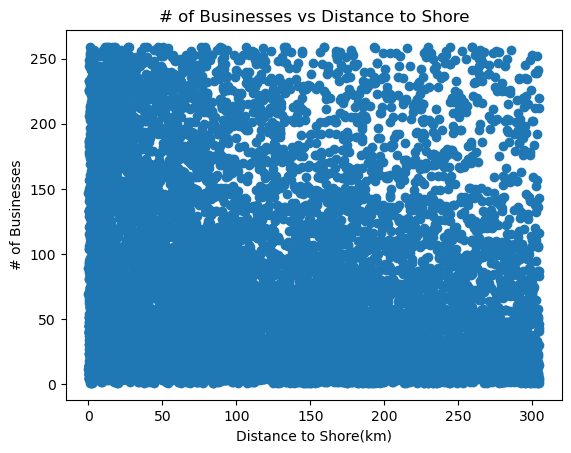

In [51]:
#scatter plot to see patterns between # of business and distance to the shore
plt.scatter(biz_to_shore['dist_to_shore'], biz_to_shore['number_of_business'])
plt.title("# of Businesses vs Distance to Shore (Small Window)")
plt.xlabel("Distance to Shore(km)")
plt.ylabel("# of Businesses")
plt.show()

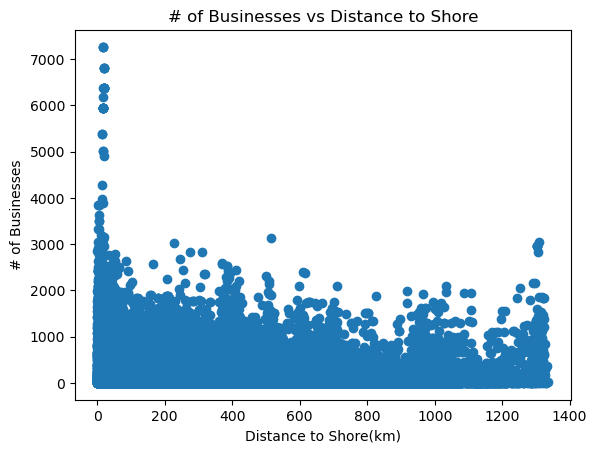

In [50]:
plt.scatter(biz_df['dist_to_shore'], biz_df['number_of_business'])
plt.title("# of Businesses vs Distance to Shore (Entire DataFrame)")
plt.xlabel("Distance to Shore(km)")
plt.ylabel("# of Businesses")
plt.show()

* Amount of businesses near the shore begin to taper off near 2000.
* Farther away from the shore, slightly less # of businesses
* Several outliers with high # of businesses near the shore

## The Outlier City -- New York City

In [54]:
#Let's look at some outliers
#grabbing the data
outliercity_df = pd.read_csv('zip_code_demographics.csv')

In [55]:
outliercity_df.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'population',
       'density', 'county_name', 'po_box', 'dist_highway',
       'dist2_large_airport', 'dist2_medium_airport', 'dist_to_shore',
       'number_of_business', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [ ]:
#getting the columns
outliers_df = outliercity_df[['city','number_of_business','dist_to_shore']]
outliers_df.head()

In [59]:
#filtering data for high amount of biz near the shore
outliers_df2 = outliers_df[(biz_df['number_of_business'] > 4000)]
outliers_df2.head(20)

,city,number_of_business,dist_to_shore
2188,New York,7263.00,17.01
2190,New York,4271.00,14.92
2199,New York,5379.00,13.57
2201,New York,5940.00,17.42
2202,New York,5018.00,17.68
2203,New York,6801.00,18.34
2204,New York,4899.00,19.48
2206,New York,6378.00,18.69
2220,New York,6176.00,18.30
27896,New York,6801.00,18.55


In [61]:
unique_cities = outliers_df2['city'].unique
print("\nUnique values in 'city' column:")
print(unique_cities)


Unique values in 'city' column:
<bound method Series.unique of 2188     New York
2190     New York
2199     New York
2201     New York
2202     New York
2203     New York
2204     New York
2206     New York
2220     New York
27896    New York
27897    New York
27898    New York
27899    New York
27900    New York
27902    New York
27903    New York
27904    New York
27905    New York
27906    New York
27907    New York
27908    New York
27909    New York
27910    New York
27911    New York
27912    New York
27913    New York
27914    New York
27915    New York
27916    New York
27918    New York
Name: city, dtype: object>


In [62]:
outliers_sorted = outliers_df2.sort_values(by='number_of_business')
outliers_sorted

,city,number_of_business,dist_to_shore
2190,New York,4271.00,14.92
2204,New York,4899.00,19.48
2202,New York,5018.00,17.68
27907,New York,5018.00,17.68
27918,New York,5379.00,12.94
2199,New York,5379.00,13.57
27910,New York,5940.00,17.42
27909,New York,5940.00,17.42
27908,New York,5940.00,17.42
27906,New York,5940.00,17.42


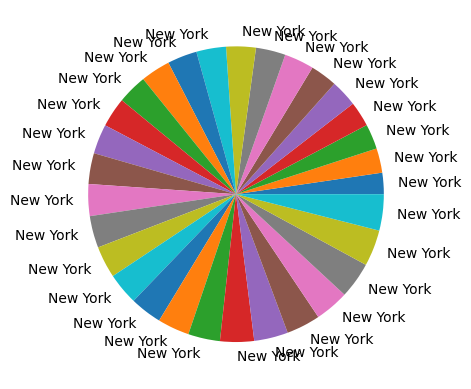

In [66]:

plt.pie(outliers_sorted['number_of_business'], labels = outliers_sorted['city'])
plt.show()

## The Other Outlier Cities

In [67]:
#getting the columns
more_outliers_df = outliercity_df[['city','number_of_business','dist_to_shore']]
more_outliers_df.head()

,city,number_of_business,dist_to_shore
0,Agawam,438.00,93.05
1,Amherst,571.00,133.37
2,Barre,97.00,97.64
3,Belchertown,217.00,114.41
4,Blandford,18.00,107.47


In [72]:
#filtering data for high amount of biz near the shore
more_outliers_df2 = more_outliers_df[(more_outliers_df['number_of_business'] < 4000) & (more_outliers_df['number_of_business'] > 2000)]
outliers_sorted2 = more_outliers_df2.sort_values(by='number_of_business')
top_20outliers = more_outliers_df2.head(20)
top_20outliers

,city,number_of_business,dist_to_shore
211,Woburn,2018.00,16.04
1797,Hackensack,2262.00,23.19
2087,Princeton,2134.00,37.06
2112,Lakewood,2109.00,14.44
2189,New York,2986.00,13.42
2196,New York,3086.00,16.29
2197,New York,3891.00,16.05
2198,New York,2974.00,14.71
2200,New York,2434.00,15.08
2205,New York,3164.00,19.18


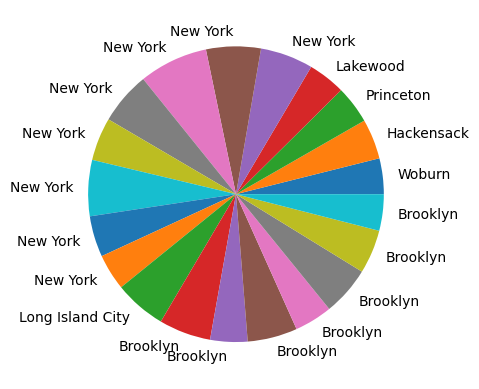

In [74]:
plt.pie(top_20outliers['number_of_business'], labels = top_20outliers['city'])
plt.show()